In [153]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import json
import pandas as pd

model = KeyedVectors.load_word2vec_format("/home/yamato/word2vec/GoogleNews-vectors-negative300.bin", binary=True)

s = []
t = []

for line in open('/home/yamato/word2vec/News_Category_Dataset_v2.json'):
    t.append(json.loads(line))
    
for l in t:
    if l['category'] not in s:
        s.append(l['category'])
category_to_id = {s[i]: i for i in range(len(s))}

In [154]:
df = pd.read_json('/home/yamato/word2vec/News_Category_Dataset_v2.json', lines=True)
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [155]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
# using headlines and short_description as input X

df['text'] = df.headline

In [156]:
# tokenizing

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)
X = tokenizer.texts_to_sequences(df.text)
df['words'] = X

# delete some empty and short data

df['word_length'] = df.words.apply(lambda i: len(i))
df = df[df.word_length >= 5]

df.head()

,authors,category,date,headline,link,short_description,text,words,word_length
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,"[378, 360, 154, 1085, 2318, 5, 396, 240, 77, 8...",14
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,"[34, 1039, 1682, 19857, 7, 16617, 4176, 6, 1, ...",14
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,"[3779, 5820, 4600, 6, 1, 65, 71, 16, 463, 8506]",10
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,"[2061, 7974, 1867, 40763, 1568, 12108, 7, 308,...",11
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,"[30772, 25572, 833, 30, 14, 5432, 2986, 2, 859...",13


In [157]:
df.word_length.describe()

count    190255.000000
mean         10.028199
std           2.824546
min           5.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          53.000000
Name: word_length, dtype: float64

In [158]:
from keras.preprocessing import sequence
maxlen = 15
X = list(sequence.pad_sequences(df.words, maxlen=maxlen))

In [159]:
df['c2id'] = df['category'].apply(lambda x: category_to_id[x])

In [160]:
df.head()

,authors,category,date,headline,link,short_description,text,words,word_length,c2id
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,"[378, 360, 154, 1085, 2318, 5, 396, 240, 77, 8...",14,0
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,"[34, 1039, 1682, 19857, 7, 16617, 4176, 6, 1, ...",14,1
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,"[3779, 5820, 4600, 6, 1, 65, 71, 16, 463, 8506]",10,1
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,"[2061, 7974, 1867, 40763, 1568, 12108, 7, 308,...",11,1
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,"[30772, 25572, 833, 30, 14, 5432, 2986, 2, 859...",13,1


# Word Embedding

In [161]:
word_index = tokenizer.word_index

EMBEDDING_DIM = 300

In [162]:
embedding_index = dict({})
for idx, key in enumerate(model.wv.vocab):
    embedding_index[key] = model.wv[key]
    # Or my_dict[key] = model.wv.get_vector(key)
    # Or my_dict[key] = model.wv.word_vec(key, use_norm=False)

/home/yamato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/home/yamato/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embedding_index))

Found 75639 unique tokens.
Total 3000000 word vectors.


# Text CNN

In [164]:
import numpy as np
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

In [165]:
# prepared data 
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

X = np.array(X)
Y = np_utils.to_categorical(list(df.c2id))

# and split to training set ,validation set and test set

seed = 30
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=seed)

In [166]:
inp = Input(shape=(maxlen,), dtype='int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2, 3, 4]:
    conv = Conv1D(64, kernel_size, padding='same', activation='relu', strides=1)(embedding)
    pool = MaxPooling1D(pool_size=3)(conv)
    drop = Dropout(0.5)(pool)
    stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)
outp = Dense(len(category_to_id), activation='softmax')(drop)

TextCNN = Model(inputs=inp, outputs=outp)
TextCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

TextCNN.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 15, 300)      22692000    input_19[0][0]                   
__________________________________________________________________________________________________
conv1d_18 (Conv1D)              (None, 15, 64)       38464       embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 15, 64)       57664       embedding_8[0][0]                
____________________________________________________________________________________________

In [167]:
textcnn_history = TextCNN.fit(x_train, 
                              y_train, 
                              batch_size=128, 
                              epochs=20, 
                              validation_data=(x_val, y_val))

Epoch 1/20
1204/1204 [==============================] - 12s 10ms/step - loss: 2.2919 - accuracy: 0.4045 - val_loss: 1.8033 - val_accuracy: 0.5021
Epoch 2/20
1204/1204 [==============================] - 12s 10ms/step - loss: 1.9096 - accuracy: 0.4830 - val_loss: 1.6960 - val_accuracy: 0.5293
Epoch 3/20
1204/1204 [==============================] - 12s 10ms/step - loss: 1.8388 - accuracy: 0.5000 - val_loss: 1.6492 - val_accuracy: 0.5416
Epoch 4/20
1204/1204 [==============================] - 12s 10ms/step - loss: 1.7980 - accuracy: 0.5086 - val_loss: 1.6262 - val_accuracy: 0.5461
Epoch 5/20
1204/1204 [==============================] - 12s 10ms/step - loss: 1.7741 - accuracy: 0.5139 - val_loss: 1.6103 - val_accuracy: 0.5496
Epoch 6/20
1204/1204 [==============================] - 11s 10ms/step - loss: 1.7522 - accuracy: 0.5190 - val_loss: 1.5958 - val_accuracy: 0.5536
Epoch 7/20
1204/1204 [==============================] - 12s 10ms/step - loss: 1.7368 - accuracy: 0.5235 - val_loss: 1.5878 -

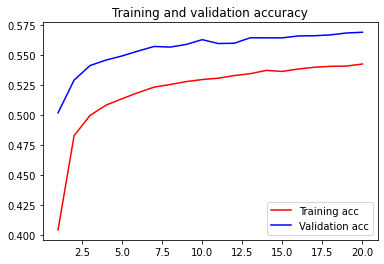

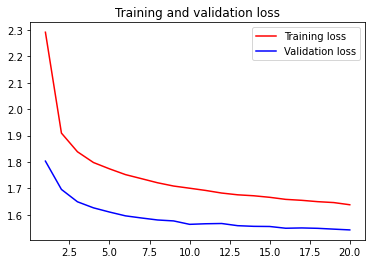

In [168]:
import matplotlib.pyplot as plt
acc = textcnn_history.history['accuracy']
val_acc = textcnn_history.history['val_accuracy']
loss = textcnn_history.history['loss']
val_loss = textcnn_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [169]:
acc = TextCNN.evaluate(x_test, y_test,batch_size=128)

149/149 [==============================] - 0s 3ms/step - loss: 1.5484 - accuracy: 0.5661


# LSTM

In [170]:
# from https://www.kaggle.com/qqgeogor/keras-lstm-attention-glove840b-lb-0-043/code
from keras.engine.topology import Layer

inp = Input(shape=(maxlen,), dtype='int32')
embedding= embedding_layer(inp)
x = Bidirectional(LSTM(32))(embedding)
x = Dense(256, activation='relu')(x)
outp = Dense(len(category_to_id), activation='softmax')(x)

lstm = Model(inputs=inp, outputs=outp)
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
lstm.summary()
 

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 15)]              0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 15, 300)           22692000  
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 64)                85248     
_________________________________________________________________
dense_28 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_29 (Dense)             (None, 41)                10537     
Total params: 22,804,425
Trainable params: 112,425
Non-trainable params: 22,692,000
_________________________________________________________________


In [171]:
lstm_history = lstm.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1204/1204 [==============================] - 19s 16ms/step - loss: 2.0042 - acc: 0.4594 - val_loss: 1.7231 - val_acc: 0.5149
Epoch 2/20
1204/1204 [==============================] - 19s 16ms/step - loss: 1.6496 - acc: 0.5330 - val_loss: 1.6358 - val_acc: 0.5362
Epoch 3/20
1204/1204 [==============================] - 19s 16ms/step - loss: 1.5536 - acc: 0.5554 - val_loss: 1.5790 - val_acc: 0.5501
Epoch 4/20
1204/1204 [==============================] - 19s 16ms/step - loss: 1.4904 - acc: 0.5704 - val_loss: 1.5476 - val_acc: 0.5588
Epoch 5/20
1204/1204 [==============================] - 19s 16ms/step - loss: 1.4426 - acc: 0.5813 - val_loss: 1.5275 - val_acc: 0.5629
Epoch 6/20
1204/1204 [==============================] - 19s 16ms/step - loss: 1.4017 - acc: 0.5910 - val_loss: 1.5162 - val_acc: 0.5651
Epoch 7/20
1204/1204 [==============================] - 19s 16ms/step - loss: 1.3692 - acc: 0.5999 - val_loss: 1.5085 - val_acc: 0.5670
Epoch 8/20
1204/1204 [==========================

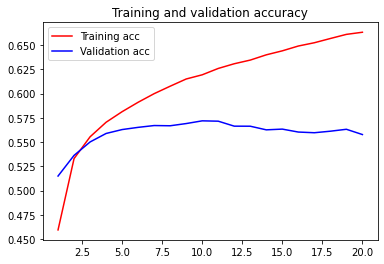

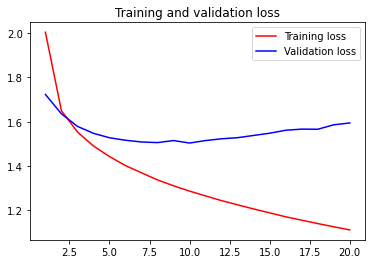

In [172]:
acc = lstm_history.history['acc']
val_acc = lstm_history.history['val_acc']
loss = lstm_history.history['loss']
val_loss = lstm_history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [173]:
acc_lstm = lstm.evaluate(x_test, y_test,batch_size=128)

149/149 [==============================] - 1s 6ms/step - loss: 1.5936 - acc: 0.5636


In [174]:
def evaluate_accuracy(model):
    predicted = model.predict(x_test)
    diff = y_test.argmax(axis=-1) - predicted.argmax(axis=-1)
    corrects = np.where(diff == 0)[0].shape[0]
    total = y_test.shape[0]
    return float(corrects/total)

print("model TextCNN accuracy:          %.6f" % evaluate_accuracy(TextCNN))
print("model lstm:                      %.6f" % evaluate_accuracy(lstm))

model TextCNN accuracy:          0.566120
model lstm:                      0.563650
